In [1]:
# this notbook is to dev adversarial attacks vs a network
# using this notebook: https://pytorch.org/tutorials/beginner/fgsm_tutorial.html

In [2]:
from __future__ import print_function

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np

import sys
sys.path.append('/home/felix/Research/Adversarial Research/FGN---Research/')
import Finite_Gaussian_Network_lib as fgnl
import Finite_Gaussian_Network_lib.fgn_helper_lib as fgnh

In [5]:
!gpustat

crescent  Tue Jul  9 09:12:05 2019
[0] GeForce GTX 1080 | 52'C,   0 % |    10 /  8119 MB |
[1] GeForce GTX 1080 | 51'C,   0 % |    10 /  8119 MB |


In [6]:
# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
print("Using device:", device)

# manualy set cuda device
torch.cuda.set_device(0)

CUDA Available:  True
Using device: cuda


In [7]:
# # random seeds
# torch.manual_seed(999)
# np.random.seed(999)

# torch.backends.cudnn.deterministic = True
# torch.cuda.manual_seed_all(999)

In [12]:
# MNIST dataset and dataloader declaration
# transforms does both the conversion from 0-255 to 0-1
# and normalizes by the precomputed mean and std

batch_size = 1

mnist_train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../../MNIST-dataset', train=True, download=False, 
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))
            ])), 
        batch_size=batch_size, shuffle=False)

mnist_test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../../MNIST-dataset', train=False, download=False, 
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))
            ])), 
        batch_size=batch_size, shuffle=False)

In [14]:
# load classic model
save_path = "../Experiments/sample_models/sample_classic_model_long_full.pth"
classic_model = torch.load(save_path)
classic_model.to(device)

/home/felix/.local/lib/python2.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/felix/.local/lib/python2.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.dropout.Dropout' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/felix/.local/lib/python2.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object'

Feedforward_Classic_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
# # test the model
# # loss functions for the classic net
# lmbda_l2 = (4.0*0.1/len(mnist_train_loader.dataset))
# print(lmbda_l2)
      
# classical_cross_ent_loss = fgnh.def_classical_cross_ent_loss(lmbda_l2)

# classic_test_res = fgnh.test(classic_model, mnist_train_loader, classical_cross_ent_loss,
#                                pred_func=fgnh.cross_ent_pred_accuracy, verbose=True)

In [15]:
# load fgn model
#  test one model
model_path = "../Experiments/sample_models/sample_fgn_model_noisy_eval_overfitted_full.pth"
dict_path =  "../Experiments/sample_models/sample_fgn_model_noisy_eval_overfitted_state_dict.pth"
params_paths = "../Experiments/sample_models/sample_fgn_model_noisy_eval_overfitted_parameters.txt"

print(model_path)
# exp params
with open(params_paths) as f: 
    print(f.read())

../Experiments/sample_models/sample_fgn_model_noisy_eval_overfitted_full.pth
hidden_l_nums [64, 64]
drop_p 0.0
noisy_centers False
batch_size 192



In [17]:
# full load
model = torch.load(model_path)
model.to(device)

# dict load
# fgn_model = fgnl.Feedforward_FGN_net(in_feats=28*28, out_feats=10, hidden_l_nums=[64,64], 
#                                      drop_p=0, noisy_centers=False).to(device)
# fgn_model.load_state_dict(state_dict=torch.load(dict_path))

/home/felix/.local/lib/python2.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'Finite_Gaussian_Network_lib.Feedforward_FGN_net.Feedforward_FGN_net' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/felix/.local/lib/python2.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'Finite_Gaussian_Network_lib.FGN_layer.FGN_layer' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): FGN_layer()
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): FGN_layer()
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

In [18]:
# test the model
### Loss Functions for the FGN

# importances of the constraints
lmbda_l2 = (4.0*0.1/len(mnist_train_loader.dataset))
lmbda_sigs = 10.0*lmbda_l2
# sig_params = sum(p.numel() for n,p in fgn_model.named_parameters() if 'sigs' in n)
# lmbda_sigs = (1.0/sig_params)

# lmbda_l2 = 0.0
# lmbda_sigs = 0.0
print("lambda for l2 loss", lmbda_l2)
print("lambda for sigs^2 loss", lmbda_sigs)

# cross ent with l2 loss and sigma loss
# fgn_cross_ent_loss = fgnl.def_fgn_cross_ent_loss(lmbda_l2, lmbda_sigs)
# normal cross_ent loss alone
fgn_cross_ent_loss = (lambda model,output,target:  F.cross_entropy(output,target.long()))

lambda for l2 loss 6.66666666667e-06
lambda for sigs^2 loss 6.66666666667e-05


In [19]:
fgn_test_res = fgnh.test(fgn_model, mnist_train_loader, fgn_cross_ent_loss,
                               pred_func=fgnh.cross_ent_pred_accuracy, verbose=True)

Test set - Average loss: 0.0780, Accuracy: 58917/60000 (98%)


In [16]:
# minimum/maximum pixel value post normalization
min_pix = (0.0/255-0.1307)/0.3081
max_pix = (255.0/255-0.1307)/0.3081
print(min_pix, max_pix)

-0.424212917884 2.82148653035


In [17]:
# set models to eval mode
classic_model.eval()
fgn_model.eval()

Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): FGN_layer()
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): FGN_layer()
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

In [21]:
fgn_model.random_eval

True

In [18]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain range
    perturbed_image = torch.clamp(perturbed_image, min_pix, max_pix)
    # Return the perturbed image
    return perturbed_image

In [19]:
def test_under_attack( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct = 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in test_loader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        loss = F.cross_entropy(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            # Special case for saving 0 epsilon examples
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save all adv examples for visualization later
            adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [20]:
classic_accuracies = []
classic_examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test_under_attack(classic_model, device, mnist_test_loader, eps)
    classic_accuracies.append(acc)
    classic_examples.append(ex)

Epsilon: 0	Test Accuracy = 9253 / 10000 = 0.9253
Epsilon: 0.05	Test Accuracy = 8128 / 10000 = 0.8128
Epsilon: 0.1	Test Accuracy = 6223 / 10000 = 0.6223
Epsilon: 0.15	Test Accuracy = 4919 / 10000 = 0.4919
Epsilon: 0.2	Test Accuracy = 4159 / 10000 = 0.4159
Epsilon: 0.25	Test Accuracy = 3757 / 10000 = 0.3757
Epsilon: 0.3	Test Accuracy = 3474 / 10000 = 0.3474


<IPython.core.display.Javascript object>


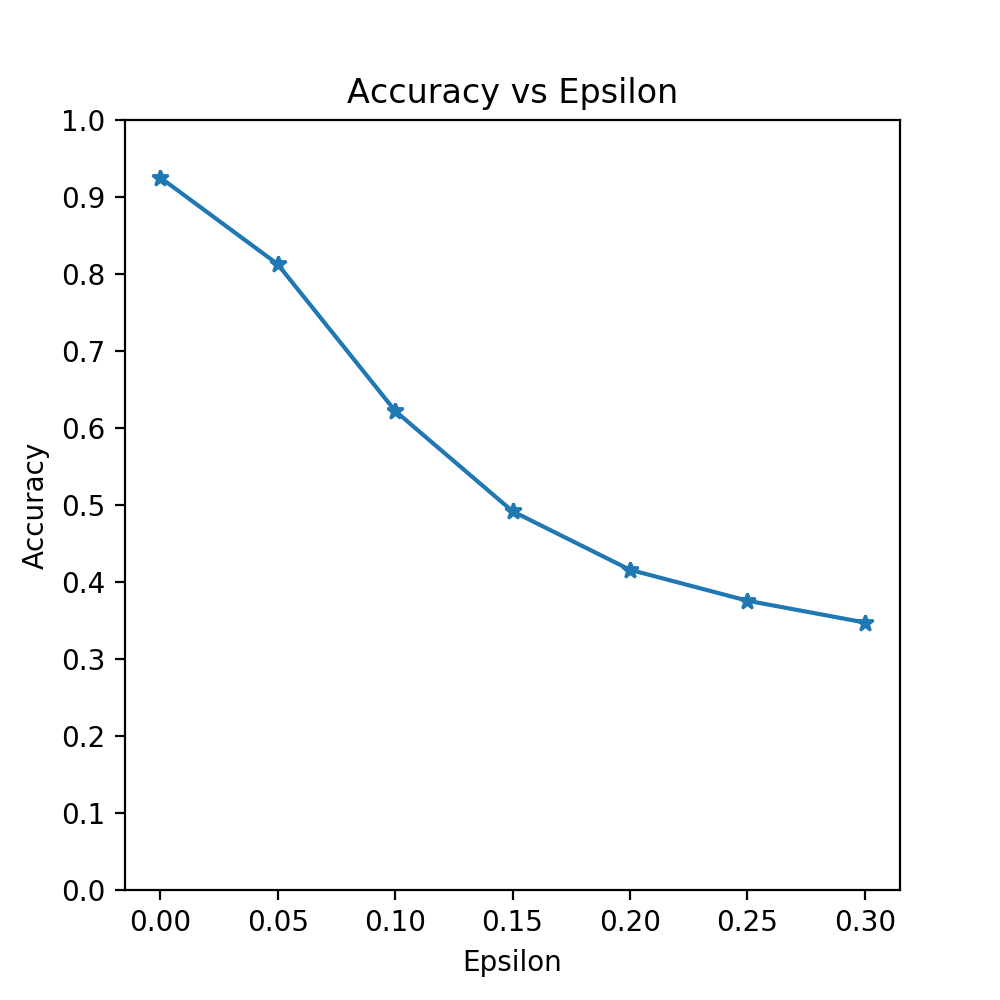

In [21]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, classic_accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

<IPython.core.display.Javascript object>


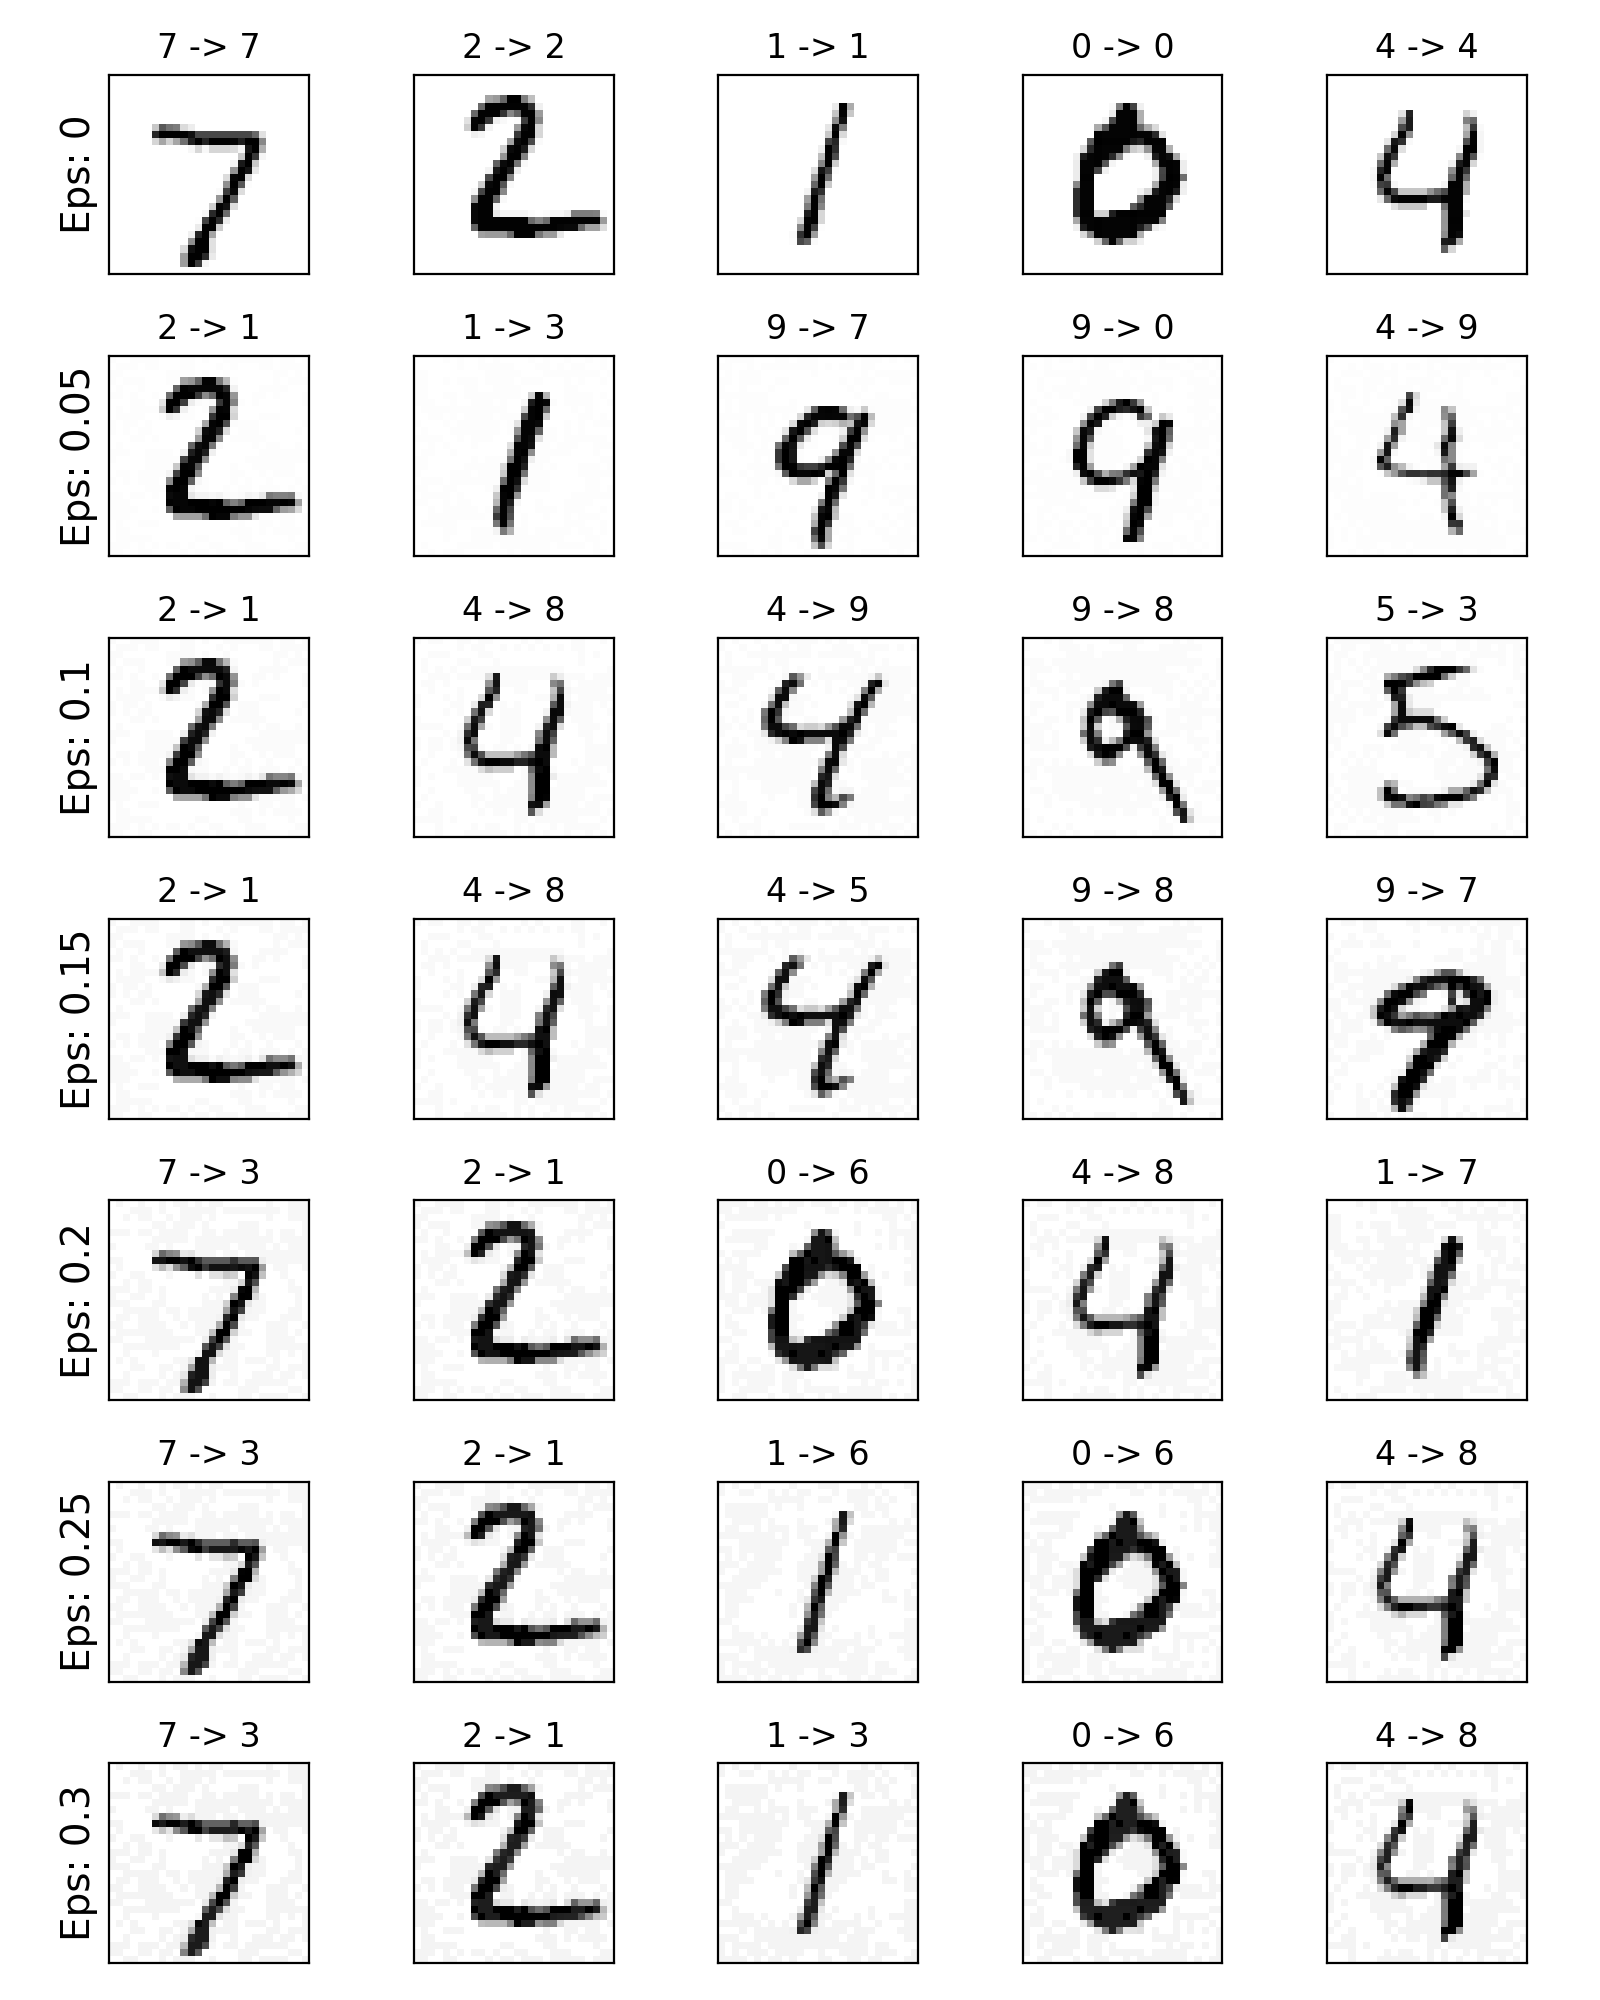

In [22]:
# Plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(5):
        cnt += 1
        plt.subplot(len(epsilons),len(classic_examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = classic_examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex, cmap=plt.cm.get_cmap('Greys'), vmin=min_pix, vmax=max_pix)
plt.tight_layout()
plt.show()

In [23]:
### atack the FGN
fgn_accuracies = []
fgn_examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test_under_attack(fgn_model, device, mnist_test_loader, eps)
    fgn_accuracies.append(acc)
    fgn_examples.append(ex)

Epsilon: 0	Test Accuracy = 3892 / 10000 = 0.3892
Epsilon: 0.05	Test Accuracy = 609 / 10000 = 0.0609
Epsilon: 0.1	Test Accuracy = 191 / 10000 = 0.0191
Epsilon: 0.15	Test Accuracy = 230 / 10000 = 0.023
Epsilon: 0.2	Test Accuracy = 202 / 10000 = 0.0202
Epsilon: 0.25	Test Accuracy = 211 / 10000 = 0.0211
Epsilon: 0.3	Test Accuracy = 196 / 10000 = 0.0196


<IPython.core.display.Javascript object>


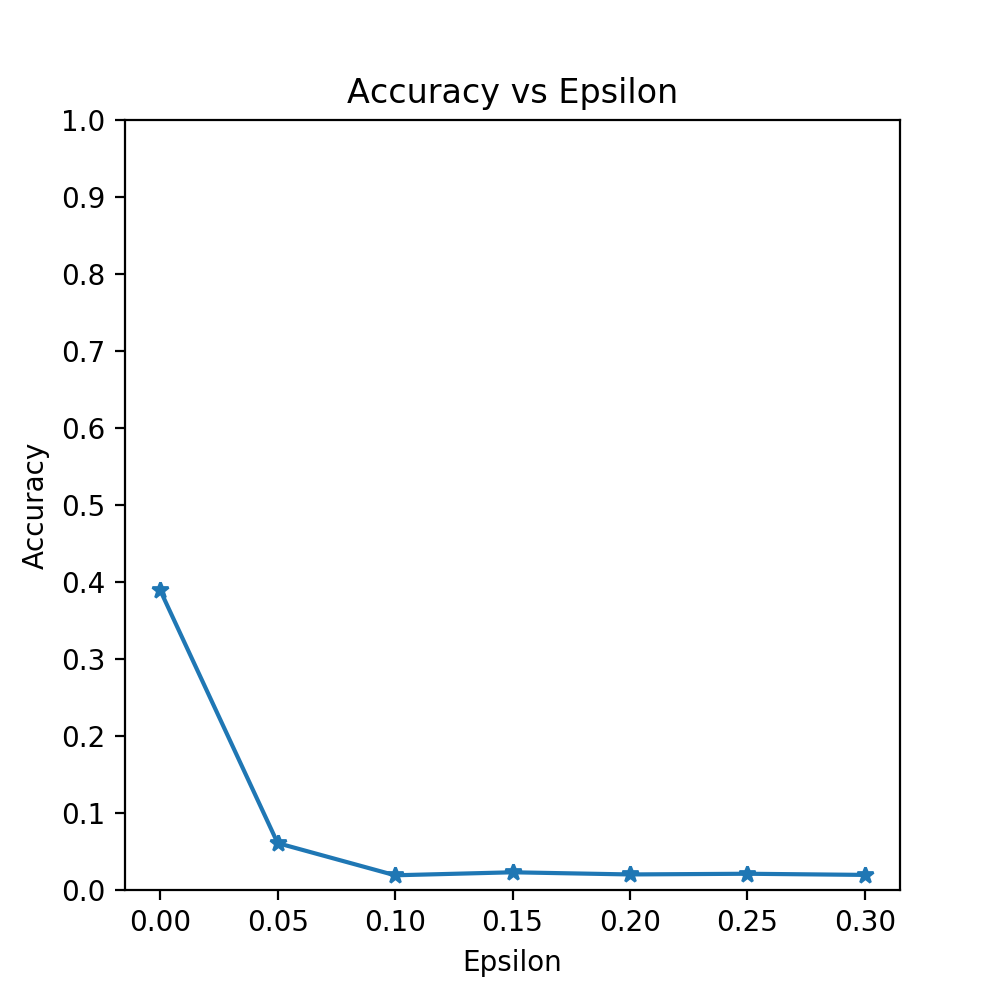

In [24]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, fgn_accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


<IPython.core.display.Javascript object>


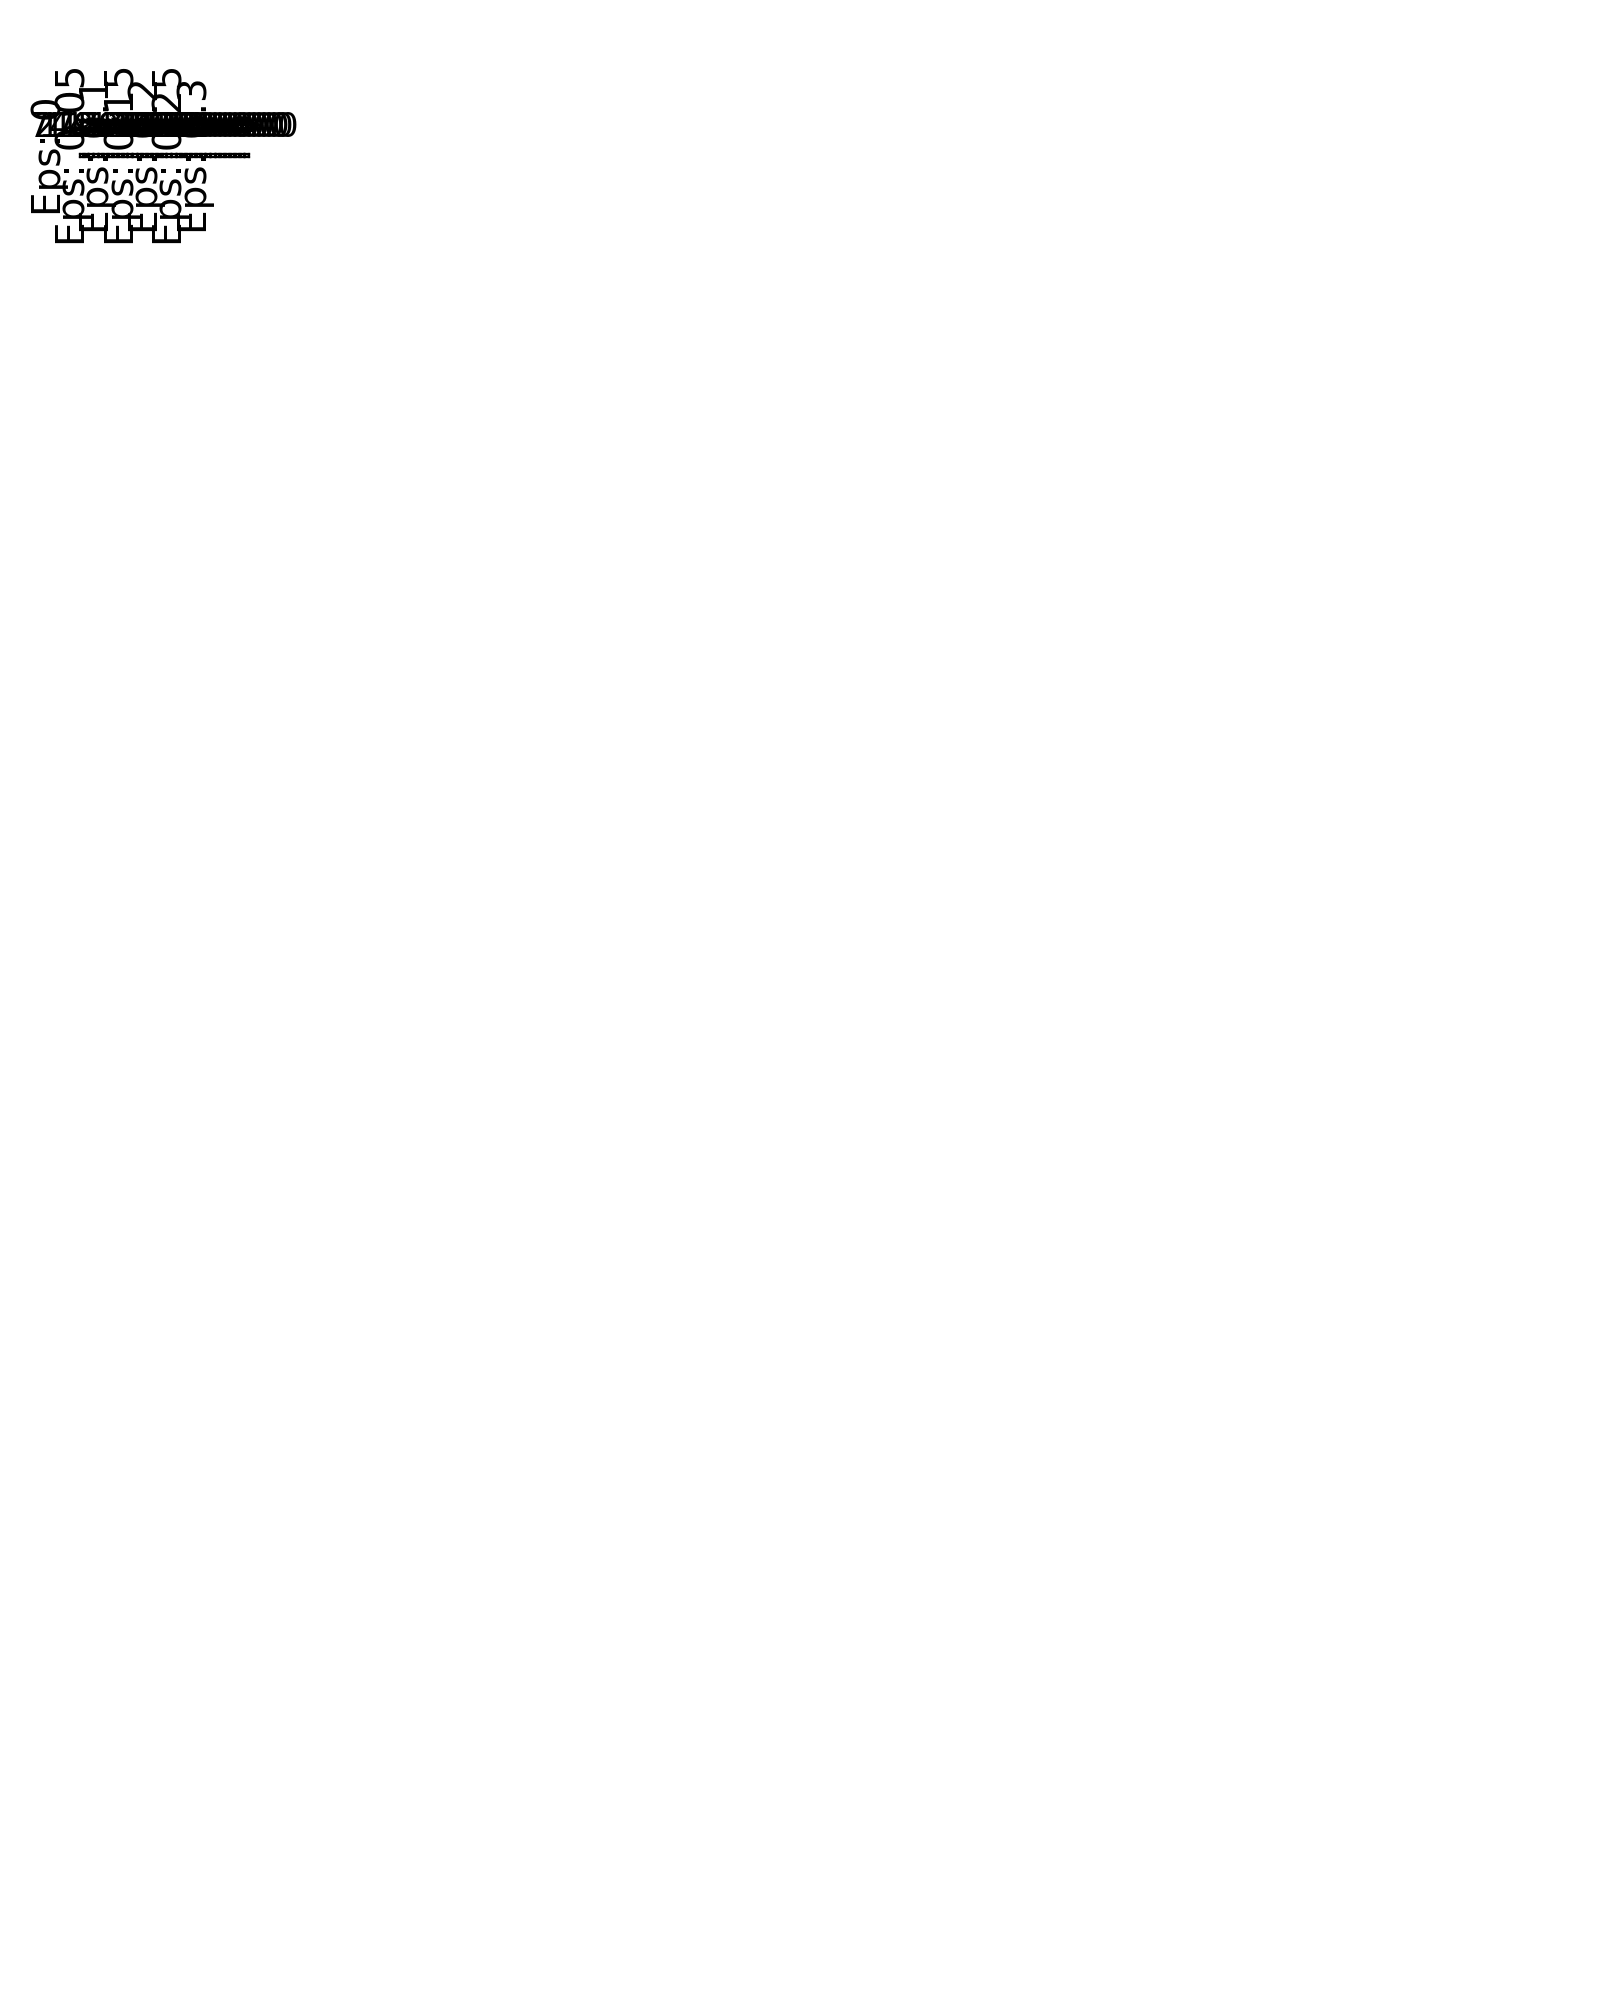

In [25]:
# Plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(5):
        cnt += 1
        plt.subplot(len(epsilons),len(fgn_examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = fgn_examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex, cmap=plt.cm.get_cmap('Greys'), vmin=min_pix, vmax=max_pix)
plt.tight_layout()
plt.show()

In [26]:
# noise stats
classic_noise = []
# successful classic attacks
for ex in classic_examples:
    print(ex[0])

(7, 7, array([[-0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293],
       [-0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293],
       [-0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, -0.42421293, -0.42421293, -0.42421293, -0.42421293,
        -0.42421293, 

In [ ]:
len(classic_examples[0][0])

In [ ]:
fgn_examples